In [1]:
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from langchain_core.pydantic_v1 import BaseModel
from langchain_openai import ChatOpenAI
import pandas as pd

model = ChatOpenAI(model="gpt-4o-mini",temperature=0)

In [2]:
from data_models import *
from MonthlySales_Data import *
from RegionalSales_Data import *

c:\LangChain\LangChain-Basics\venv\lib\site-packages\langchain\hub.py:86: DeprecationWarning: The `langchainhub sdk` is deprecated.
Please use the `langsmith sdk` instead:
  pip install langsmith
Use the `pull_prompt` method.
  res_dict = client.pull_repo(owner_repo_commit)


In [3]:
#MonthlySales_Data=MonthlySalesData_chain.invoke({"query": MonthlySalesData_query})
#RegionalSales_Data=RegionalSalesData_chain.invoke({"query": RegionalSalesData_query})

In [4]:
#MonthlySales_Data

In [5]:
#RegionalSales_Data

In [7]:
# MonthlySales_df = pd.DataFrame(MonthlySales_Data)
# RegionalSales_df = pd.DataFrame(RegionalSales_Data)

In [6]:
# MonthlySales_df

In [9]:
#RegionalSales_df

,2020,2021,2022
0,"{'month': 'January', 'sales_volume_units': 500...","{'month': 'January', 'sales_volume_units': 600...","{'month': 'January', 'sales_volume_units': 700..."
1,"{'month': 'February', 'sales_volume_units': 48...","{'month': 'February', 'sales_volume_units': 59...","{'month': 'February', 'sales_volume_units': 68..."
2,"{'month': 'March', 'sales_volume_units': 60000...","{'month': 'March', 'sales_volume_units': 70000...","{'month': 'March', 'sales_volume_units': 80000..."
3,"{'month': 'April', 'sales_volume_units': 55000...","{'month': 'April', 'sales_volume_units': 65000...","{'month': 'April', 'sales_volume_units': 75000..."
4,"{'month': 'May', 'sales_volume_units': 7000000...","{'month': 'May', 'sales_volume_units': 8000000...","{'month': 'May', 'sales_volume_units': 9000000..."
5,"{'month': 'June', 'sales_volume_units': 750000...","{'month': 'June', 'sales_volume_units': 850000...","{'month': 'June', 'sales_volume_units': 950000..."
6,"{'month': 'July', 'sales_volume_units': 800000...","{'month': 'July', 'sales_volume_units': 900000...","{'month': 'July', 'sales_volume_units': 100000..."
7,"{'month': 'August', 'sales_volume_units': 8500...","{'month': 'August', 'sales_volume_units': 9500...","{'month': 'August', 'sales_volume_units': 1100..."
8,"{'month': 'September', 'sales_volume_units': 9...","{'month': 'September', 'sales_volume_units': 1...","{'month': 'September', 'sales_volume_units': 1..."
9,"{'month': 'October', 'sales_volume_units': 950...","{'month': 'October', 'sales_volume_units': 110...","{'month': 'October', 'sales_volume_units': 130..."


In [11]:
# MonthlySales_df.to_csv('MonthlySales_Data.csv', index=False)
# RegionalSales_df.to_csv('RegionalSales_Data.csv', index=False)

In [8]:
# Load the DataFrames from the CSV files
MonthlySales_df = pd.read_csv('MonthlySales_Data.csv')
RegionalSales_df = pd.read_csv('RegionalSales_Data.csv')

In [11]:
def fetch_data_by_year(df, year):
    """
    Fetches data for a specific year from the DataFrame called "MonthlySales_df"
    
    Args:
    df (pd.DataFrame): The DataFrame containing the sales data.
    year (int): The year for which data is required.
    
    Returns:
    pd.DataFrame: Filtered DataFrame containing data for the specified year.
    """
    return df[df['month'].str.contains(str(year))].reset_index(drop=True)

In [12]:
fetch_data_by_year(MonthlySales_df,2021)


,month,sales_volume_units,revenue_million_usd,average_price_per_unit_usd
0,January 2021,110000,3300.0,30.0
1,February 2021,105000,3150.0,30.0
2,March 2021,115000,3450.0,30.0
3,April 2021,120000,3600.0,30.0
4,May 2021,130000,3900.0,30.0
5,June 2021,140000,4200.0,30.0
6,July 2021,150000,4500.0,30.0
7,August 2021,160000,4800.0,30.0
8,September 2021,170000,5100.0,30.0
9,October 2021,180000,5400.0,30.0


In [13]:

import pandas as pd

def summarize_sales_data(df: pd.DataFrame) -> pd.DataFrame:
    """
    Provides a summary of the sales data, including total, mean, median, and standard deviation.
    
    Args:
    df (pd.DataFrame): The DataFrame containing the sales data.
    
    Returns:
    pd.DataFrame: A DataFrame summarizing total, mean, median, and standard deviation.
    """
    summary = {
        'Total Sales Volume': df['sales_volume_units'].sum(),
        'Mean Sales Volume': df['sales_volume_units'].mean(),
        'Median Sales Volume': df['sales_volume_units'].median(),
        'Std Dev Sales Volume': df['sales_volume_units'].std(),
        'Total Revenue': df['revenue_million_usd'].sum(),
        'Mean Revenue': df['revenue_million_usd'].mean(),
        'Median Revenue': df['revenue_million_usd'].median(),
        'Std Dev Revenue': df['revenue_million_usd'].std(),
        'Total Average Price': df['average_price_per_unit_usd'].mean()  # Assuming uniform price across months
    }
    return pd.DataFrame([summary])


In [14]:
from testfunc import *


### 4. **Example Usage**


# Summarize Sales Data
summary_df = summarize_sales_data(MonthlySales_df)
print(summary_df)


   Total Sales Volume  Mean Sales Volume  Median Sales Volume  \
0             5665000      157361.111111             145000.0   

   Std Dev Sales Volume  Total Revenue  Mean Revenue  Median Revenue  \
0          76508.506634       169950.0   4720.833333          4350.0   

   Std Dev Revenue  Total Average Price  
0      2295.255199                 30.0  


In [15]:

# Yearly Sales Summary
yearly_summary_df = yearly_sales_summary(MonthlySales_df)
print(yearly_summary_df)


   Year  Total_Sales_Volume  Total_Revenue
0  2020              925000        27750.0
1  2021             1770000        53100.0
2  2022             2970000        89100.0


In [16]:

# Monthly Sales Trend
monthly_trend_df = monthly_sales_trend(MonthlySales_df)
print(monthly_trend_df)


            sales_volume_units  revenue_million_usd
Month                                              
2020-01-01               50000               1500.0
2020-02-01               45000               1350.0
2020-03-01               60000               1800.0
2020-04-01               55000               1650.0
2020-05-01               70000               2100.0
2020-06-01               80000               2400.0
2020-07-01               75000               2250.0
2020-08-01               90000               2700.0
2020-09-01               85000               2550.0
2020-10-01               95000               2850.0
2020-11-01              100000               3000.0
2020-12-01              120000               3600.0
2021-01-01              110000               3300.0
2021-02-01              105000               3150.0
2021-03-01              115000               3450.0
2021-04-01              120000               3600.0
2021-05-01              130000               3900.0
2021-06-01  

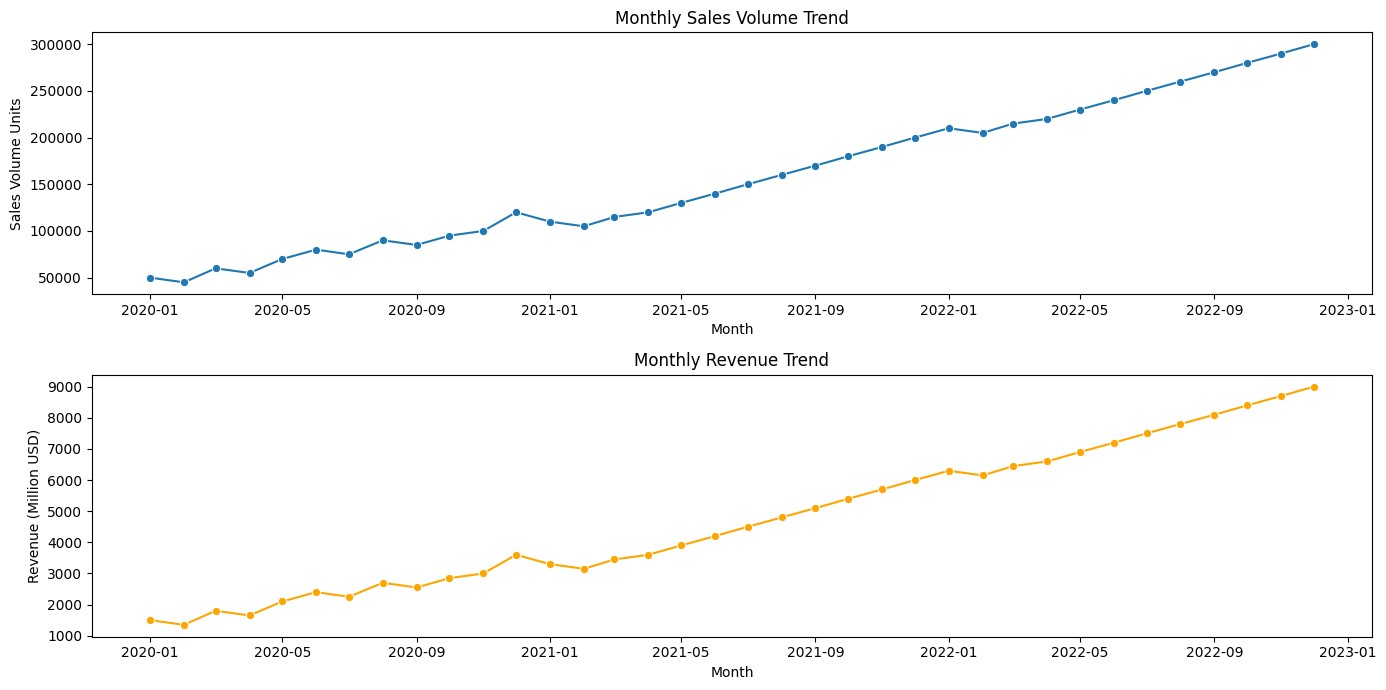

In [17]:

# Plot Monthly Trends
plot_monthly_trends(MonthlySales_df)


<Figure size 1200x600 with 0 Axes>

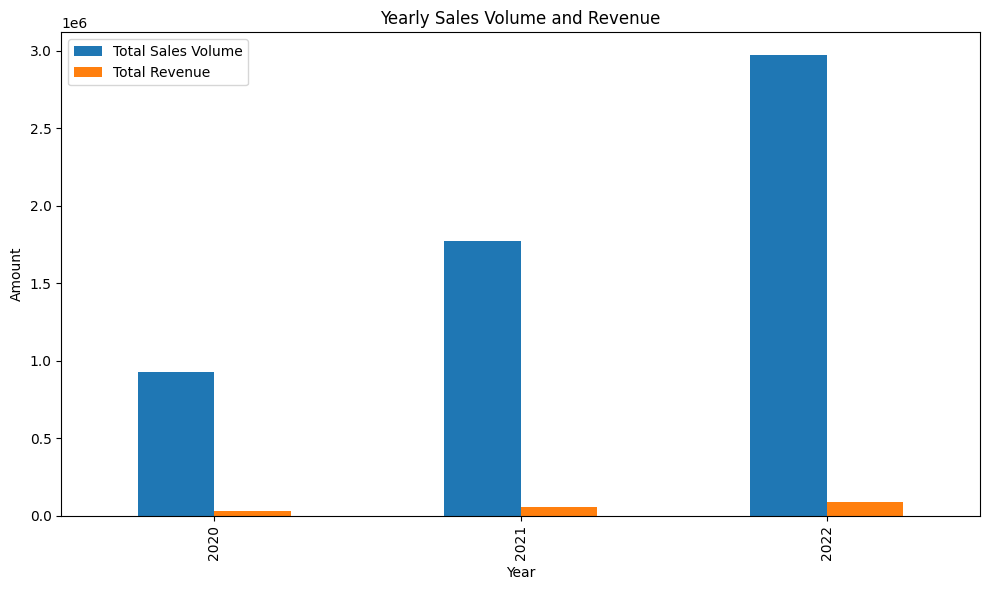

In [18]:

# Plot Yearly Sales Summary
plot_yearly_sales_summary(yearly_summary_df)


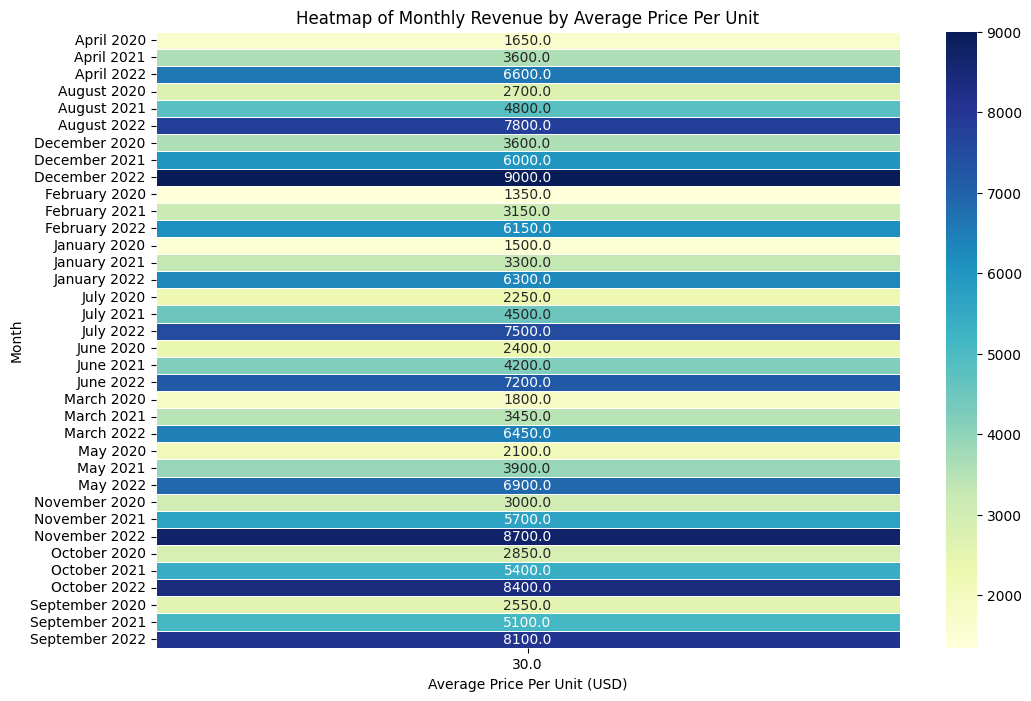

In [19]:

# Plot Heatmap
plot_heatmap(MonthlySales_df)

In [22]:
from MonthlySales_Data import *
MonthlySales_agent_executor.invoke({
    "input": "Give me the sales data for the year 2021."
})



> Entering new AgentExecutor chain...

Invoking: `fetch_data_by_year` with `{'year': 2021}`


             month  sales_volume_units  revenue_million_usd  \
0     January 2021              110000               3300.0   
1    February 2021              105000               3150.0   
2       March 2021              115000               3450.0   
3       April 2021              120000               3600.0   
4         May 2021              130000               3900.0   
5        June 2021              140000               4200.0   
6        July 2021              150000               4500.0   
7      August 2021              160000               4800.0   
8   September 2021              170000               5100.0   
9     October 2021              180000               5400.0   
10   November 2021              190000               5700.0   
11   December 2021              200000               6000.0   

    average_price_per_unit_usd  
0                         30.0  
1                 

{'input': 'Give me the sales data for the year 2021.',
 'output': 'Here is the sales data for the year 2021:\n\n| Month            | Sales Volume Units | Revenue (Million USD) | Average Price per Unit (USD) |\n|------------------|--------------------|------------------------|-------------------------------|\n| January 2021     | 110,000            | 3,300.0                | 30.0                          |\n| February 2021    | 105,000            | 3,150.0                | 30.0                          |\n| March 2021       | 115,000            | 3,450.0                | 30.0                          |\n| April 2021       | 120,000            | 3,600.0                | 30.0                          |\n| May 2021         | 130,000            | 3,900.0                | 30.0                          |\n| June 2021        | 140,000            | 4,200.0                | 30.0                          |\n| July 2021        | 150,000            | 4,500.0                | 30.0                   



> Entering new AgentExecutor chain...

Invoking: `plot_correlation_heatmap` with `{}`




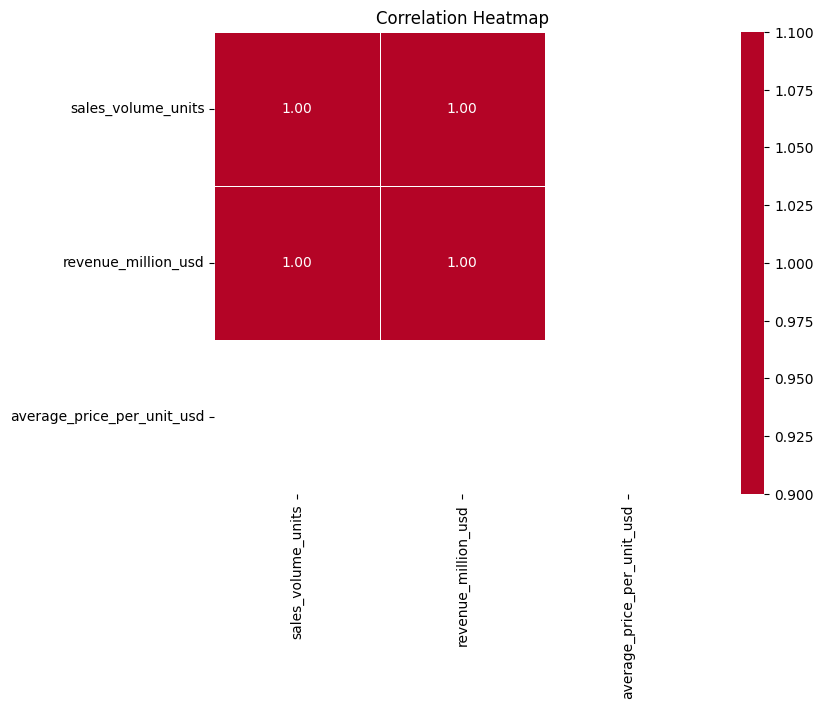

NoneThe correlation heatmap has been created and displayed successfully. If you have any further questions or need additional analysis, feel free to ask!

> Finished chain.


{'input': 'Create a heatmap for correlation.',
 'output': 'The correlation heatmap has been created and displayed successfully. If you have any further questions or need additional analysis, feel free to ask!'}

In [25]:
from MonthlySales_Data import *
MonthlySales_agent_executor.invoke({
    "input": "Create a heatmap for correlation."
})

In [20]:
from MonthlySales_Data import *
MonthlySales_agent_executor.invoke({
    "input": "Give me the sales data for the january 2021."
})



> Entering new AgentExecutor chain...

Invoking: `fetch_data_by_month_year` with `{'month': 'January', 'year': 2021}`


          month  sales_volume_units  revenue_million_usd  \
0  January 2021              110000               3300.0   

   average_price_per_unit_usd  
0                        30.0  The sales data for January 2021 is as follows:

- **Sales Volume Units:** 110,000
- **Revenue:** 3,300 million USD
- **Average Price per Unit:** 30.0 USD

> Finished chain.


{'input': 'Give me the sales data for the january 2021.',
 'output': 'The sales data for January 2021 is as follows:\n\n- **Sales Volume Units:** 110,000\n- **Revenue:** 3,300 million USD\n- **Average Price per Unit:** 30.0 USD'}

In [21]:
from MonthlySales_Data import *
MonthlySales_agent_executor.invoke({
    "input": "Give me the sales data from jan 2020 to Sept 2022."
})



> Entering new AgentExecutor chain...

Invoking: `fetch_data_by_date_range` with `{'start_date': 'January 2020', 'end_date': 'September 2022'}`


             month  sales_volume_units  revenue_million_usd  \
0     January 2020               50000               1500.0   
1       March 2020               60000               1800.0   
2         May 2020               70000               2100.0   
3        June 2020               80000               2400.0   
4        July 2020               75000               2250.0   
5   September 2020               85000               2550.0   
6     October 2020               95000               2850.0   
7    November 2020              100000               3000.0   
8     January 2021              110000               3300.0   
9       March 2021              115000               3450.0   
10        May 2021              130000               3900.0   
11       June 2021              140000               4200.0   
12       July 2021              1

{'input': 'Give me the sales data from jan 2020 to Sept 2022.',
 'output': 'Here is the sales data from January 2020 to September 2022:\n\n| Month              | Sales Volume Units | Revenue (Million USD) | Average Price per Unit (USD) |\n|--------------------|--------------------|------------------------|-------------------------------|\n| January 2020       | 50,000             | 1,500.0                | 30.0                          |\n| March 2020         | 60,000             | 1,800.0                | 30.0                          |\n| May 2020           | 70,000             | 2,100.0                | 30.0                          |\n| June 2020          | 80,000             | 2,400.0                | 30.0                          |\n| July 2020          | 75,000             | 2,250.0                | 30.0                          |\n| September 2020     | 85,000             | 2,550.0                | 30.0                          |\n| October 2020       | 95,000             | 2,8



> Entering new AgentExecutor chain...

Invoking: `plot_sales_revenue` with `{}`




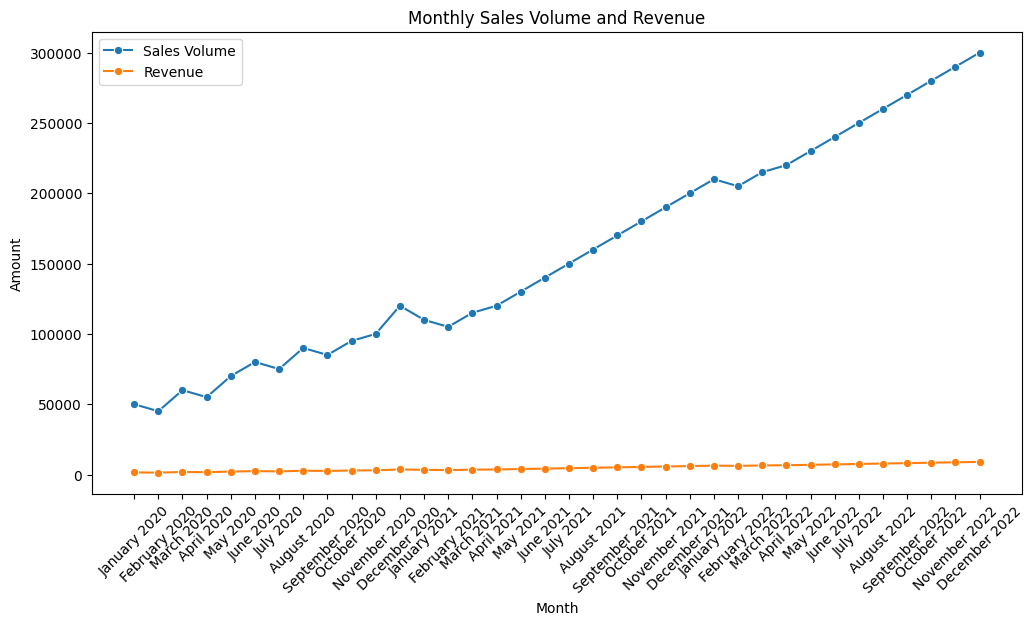

NoneThe sales revenue has been successfully plotted. If you have any other requests or need further analysis, feel free to ask!

> Finished chain.


{'input': 'Plot the sales revenue.',
 'output': 'The sales revenue has been successfully plotted. If you have any other requests or need further analysis, feel free to ask!'}

In [22]:
from MonthlySales_Data import *
MonthlySales_agent_executor.invoke({
    "input": "Plot the sales revenue."
})



> Entering new AgentExecutor chain...

Invoking: `fetch_data_by_year` with `{'year': 2021}`


             month  sales_volume_units  revenue_million_usd  \
0     January 2021              110000               3300.0   
1    February 2021              105000               3150.0   
2       March 2021              115000               3450.0   
3       April 2021              120000               3600.0   
4         May 2021              130000               3900.0   
5        June 2021              140000               4200.0   
6        July 2021              150000               4500.0   
7      August 2021              160000               4800.0   
8   September 2021              170000               5100.0   
9     October 2021              180000               5400.0   
10   November 2021              190000               5700.0   
11   December 2021              200000               6000.0   

    average_price_per_unit_usd  
0                         30.0  
1                 

c:\LangChain\LangChain-Basics\Projects\Sales-Bot\MonthlySales_Data.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='month', y='revenue_million_usd', palette='viridis')


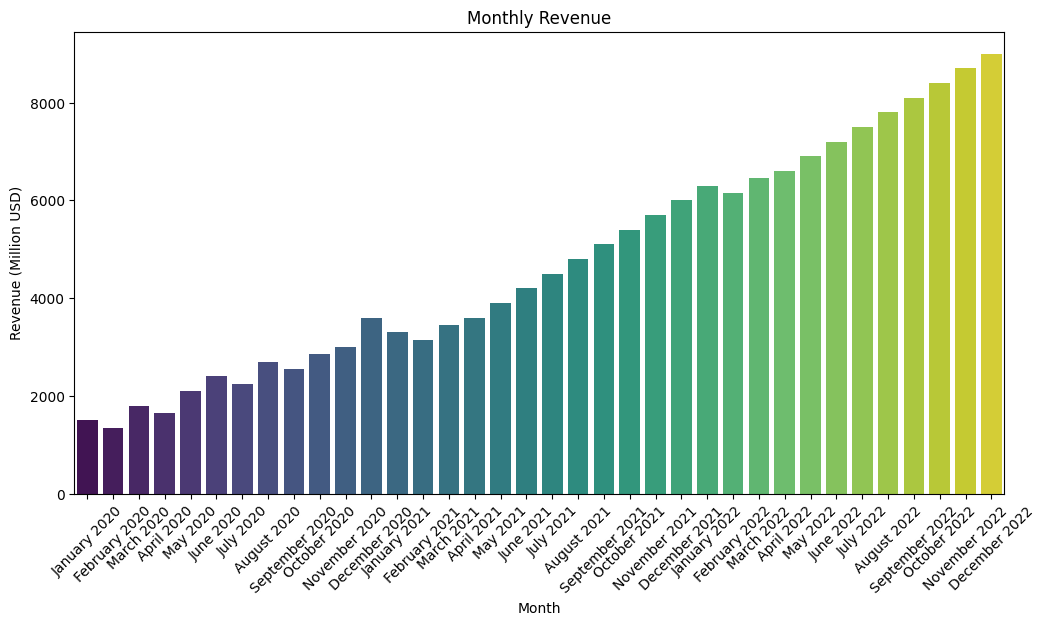

NoneThe sales revenue for the year 2021 has been successfully plotted. If you need any further analysis or information, feel free to ask!

> Finished chain.


{'input': 'Plot the sales revenue for only 2021.',
 'output': 'The sales revenue for the year 2021 has been successfully plotted. If you need any further analysis or information, feel free to ask!'}

In [23]:
from MonthlySales_Data import *
MonthlySales_agent_executor.invoke({
    "input": "Plot the sales revenue for only 2021."
})



> Entering new AgentExecutor chain...

Invoking: `plot_avg_price_per_unit` with `{}`




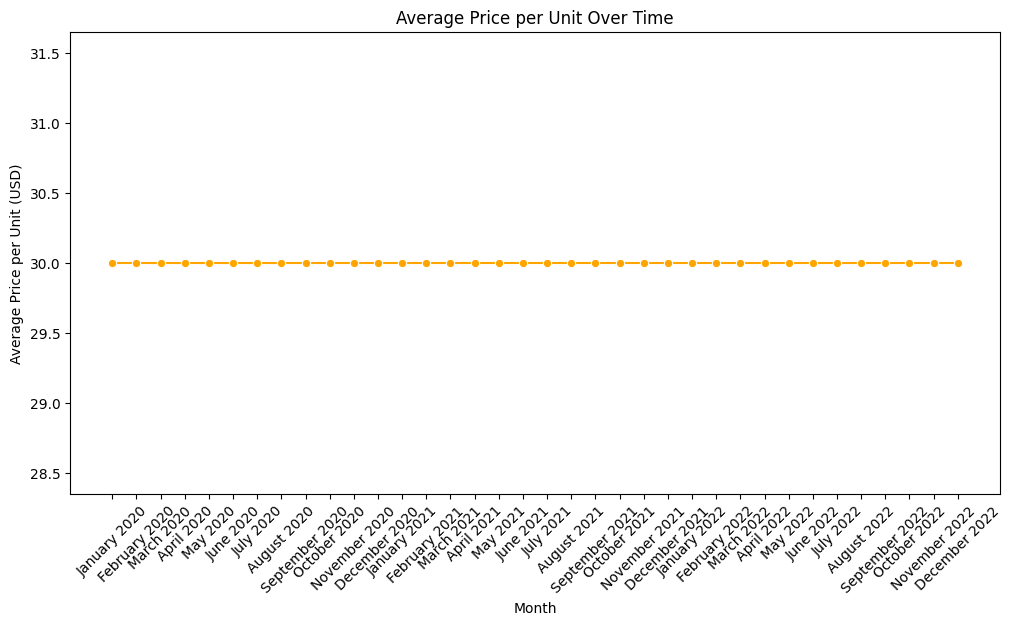

NoneThe line chart showing the average price per unit over time has been displayed. You can now visually analyze the trends in pricing for the items across the years. If you have any specific questions or need further analysis, feel free to ask!

> Finished chain.


{'input': 'I want to visually see the price per item over these yers.',
 'output': 'The line chart showing the average price per unit over time has been displayed. You can now visually analyze the trends in pricing for the items across the years. If you have any specific questions or need further analysis, feel free to ask!'}

In [27]:
from MonthlySales_Data import *
MonthlySales_agent_executor.invoke({
    "input": "I want to visually see the price per item over these yers."
})

In [33]:
from MonthlySales_Data import *
MonthlySales_agent_executor.invoke({
    "input": "Can you show me heat map of sales revenue?."
})



> Entering new AgentExecutor chain...

Invoking: `plot_heatmap_sales_revenue` with `{}`




TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given



> Entering new AgentExecutor chain...

Invoking: `plot_avg_price_per_unit` with `{}`




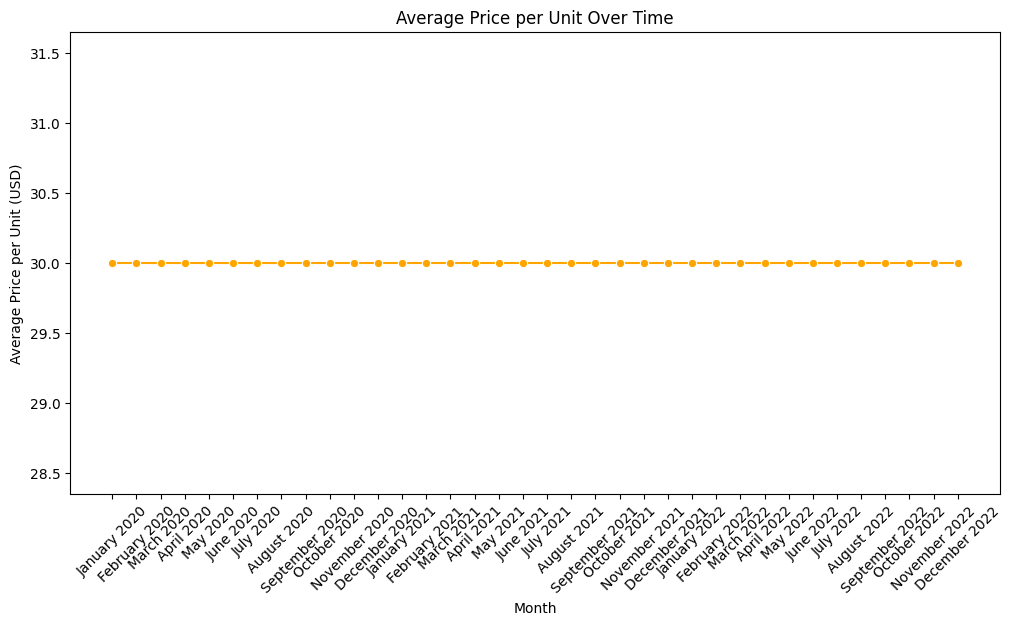

NoneThe chart displaying the average price per unit over time has been generated. You can now visually analyze the trends in pricing for the items over the years. If you need further insights or another type of analysis, feel free to ask!

> Finished chain.


{'input': 'I want to visually see the price per item over these yers.',
 'output': 'The chart displaying the average price per unit over time has been generated. You can now visually analyze the trends in pricing for the items over the years. If you need further insights or another type of analysis, feel free to ask!'}

In [34]:
from MonthlySales_Data import *
MonthlySales_agent_executor.invoke({
    "input": "I want to visually see the price per item over these yers."
})


In [41]:
from MonthlySales_Data import *
MonthlySales_agent_executor.invoke({
    "input": "Can you show me heat map of sales revenue?."
})



> Entering new AgentExecutor chain...

Invoking: `plot_heatmap_sales_revenue` with `{}`




TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

In [43]:
from MonthlySales_Data import *
MonthlySales_agent_executor.invoke({
    "input": "I want to visually yearly summary sales."
})




> Entering new AgentExecutor chain...

Invoking: `yearly_summary` with `{}`




TypeError: StringMethods.split() takes from 1 to 2 positional arguments but 3 were given

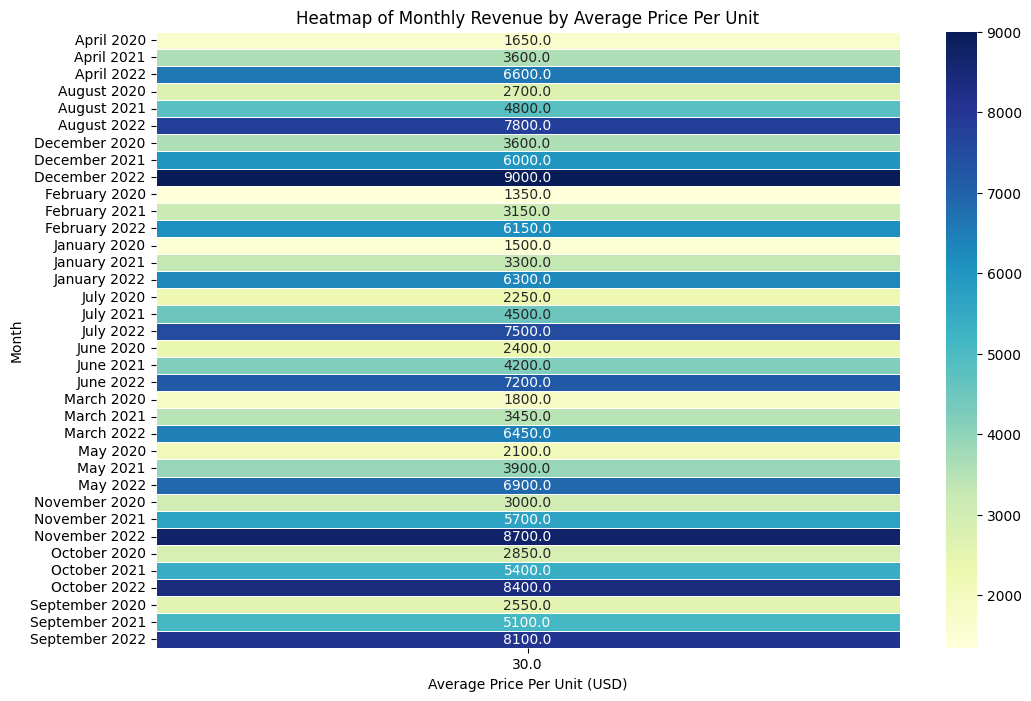

In [32]:
plot_heatmap(MonthlySales_df)

In [36]:
plot_heatmap_sales_revenue()

TypeError: BaseTool.__call__() missing 1 required positional argument: 'tool_input'